CNN model

1.Convolutional layer- we need to give input as a image.

2.we need to extract feature map like we need to extract our required data - relu input-size,input shape.

3.After the sept 2 we get the feature map.

4.Next we need to give it to the pooling layer. Here we have max pooling and average pooling

5.in pooling- we need to initilize pool size and stridge

6.The output from the pooling layeris passed to the flatten layer.

7.The flatten layer will be in the form of vector format

8.Then we need to proceed to the fully connectd layer-Fully connected is nothing but the connection layer

9.In fully connected layer we are going to use the hidden layer and output layer.For creating the hidden and output layer we are using the dense function.

10.After this we are going to find the error using the Cost function.

11.Compile the model-Loss,metrices,optimizer.


Fitting the data with the model-x_train,x_test

The complete forward and backward is known as epoch .so After we need to initilize the epoch.





In [1]:
ls

drive/  sample_data/


In [2]:
cd/content/drive/MyDrive/IBM/Dataset day 7 animal/CNN


[Errno 2] No such file or directory: '/content/drive/MyDrive/IBM/Dataset day 7 animal/CNN'
/content


In [3]:
ls

drive/  sample_data/


In [4]:
pwd

'/content'

In [5]:
! unzip Animal_Dataset.zip

unzip:  cannot find or open Animal_Dataset.zip, Animal_Dataset.zip.zip or Animal_Dataset.zip.ZIP.


Here we need to go for the augmenting the data or augmentating the image.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,horizontal_flip=True,vertical_flip=True,zoom_range=0.2)

#The scaling will apply on training and testing data ,but apart from the scaling others are only apply on training data


In [ ]:
# now we need to apply test data

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/IBM/Dataset day 8 animal/CNN/dataset/Training",
                                         target_size=(64,64),class_mode="categorical",batch_size=24)

Found 1238 images belonging to 4 classes.


In [ ]:
x_test=test_datagen.flow_from_directory(r"/content/drive/MyDrive/IBM/Dataset day 8 animal/CNN/dataset/Testing",
                                         target_size=(64,64),class_mode="categorical",batch_size=24)

Found 326 images belonging to 4 classes.


## Then we need to build the model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [ ]:
model = Sequential()

In [ ]:
model.add(Convolution2D(32,(3,3),activation= "relu",input_shape=(64,64,3)))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(100,activation="relu"))

In [ ]:
model.add(Dense(100,activation="relu"))

In [ ]:
model.add(Dense(4,activation="softmax"))

In [ ]:
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer="adam")

In [ ]:
len(x_train)

52

In [ ]:
model.fit(x_train,epochs=5,validation_data=x_test,steps_per_epoch=len(x_train),validation_steps=len(x_test))

Epoch 1/5
52/52 [==============================] - 339s 7s/step - loss: 1.3886 - accuracy: 0.3489 - val_loss: 1.1572 - val_accuracy: 0.5337
Epoch 2/5
52/52 [==============================] - 12s 238ms/step - loss: 1.0888 - accuracy: 0.5234 - val_loss: 0.9790 - val_accuracy: 0.6104
Epoch 3/5
52/52 [==============================] - 12s 236ms/step - loss: 0.9235 - accuracy: 0.6066 - val_loss: 0.8140 - val_accuracy: 0.6380
Epoch 4/5
52/52 [==============================] - 12s 238ms/step - loss: 0.8526 - accuracy: 0.6511 - val_loss: 0.8976 - val_accuracy: 0.5859
Epoch 5/5
52/52 [==============================] - 12s 239ms/step - loss: 0.8075 - accuracy: 0.6640 - val_loss: 0.7436 - val_accuracy: 0.6963


In [ ]:
model.save("animal.h5")

# Testing the model

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
model = load_model("/content/drive/MyDrive/IBM/Dataset day 8 animal/CNN/animal.h5")

In [ ]:
img = image.load_img("/content/drive/MyDrive/IBM/Dataset day 8 animal/CNN/dataset/Training/elephants/2Q__ (10).jpeg",target_size=(64,64))

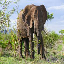

In [ ]:
img

In [ ]:
x = image.img_to_array(img)
x

array([[[169., 180., 176.],
        [177., 191., 168.],
        [195., 204., 213.],
        ...,
        [182., 202., 239.],
        [181., 200., 240.],
        [179., 199., 236.]],

       [[187., 201., 214.],
        [207., 221., 232.],
        [202., 213., 243.],
        ...,
        [186., 204., 240.],
        [184., 202., 238.],
        [178., 200., 239.]],

       [[147., 172., 143.],
        [208., 227., 234.],
        [202., 214., 255.],
        ...,
        [190., 206., 239.],
        [188., 205., 235.],
        [179., 201., 238.]],

       ...,

       [[146., 150.,  99.],
        [173., 179., 131.],
        [159., 171.,  99.],
        ...,
        [167., 157., 132.],
        [134., 137., 106.],
        [166., 161., 165.]],

       [[142., 177.,  83.],
        [160., 183.,  92.],
        [142., 157.,  76.],
        ...,
        [129., 127., 102.],
        [153., 151., 113.],
        [135., 146., 103.]],

       [[103., 142.,  53.],
        [150., 174.,  90.],
        [104., 1

In [ ]:
model.predict(x)

ValueError: ignored

#The function needs 4 dimension but it giving the 3 dimension so we need to pass it on as a 4 dimension

In [ ]:
x.ndim

3

In [ ]:
#we use numpy to convert 3 dimensions into 4 dimensions
x=np.expand_dims(x,axis=0)

In [ ]:
x.ndim

4

In [ ]:
pred=model.predict(x)

In [ ]:
pred

array([[0., 0., 1., 0.]], dtype=float32)

# Here i pass elephants and we got output as a elephant like 1 incdicates 1

In [ ]:
labels=["bears","crows","elephants","rats"]

In [ ]:
labels[2]

'elephants'

In [ ]:
np.argmax(pred)

2

In [ ]:
labels[np.argmax(pred)]

'elephants'